In [1]:
from winsound import SND_PURGE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay

In [3]:
df = pd.read_csv(r"D:\NLPDS\banknotes.csv")
df

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [4]:
x = df.drop('Class',axis = 1)
y = df['Class']

In [5]:
y.value_counts()

Class
0    762
1    610
Name: count, dtype: int64

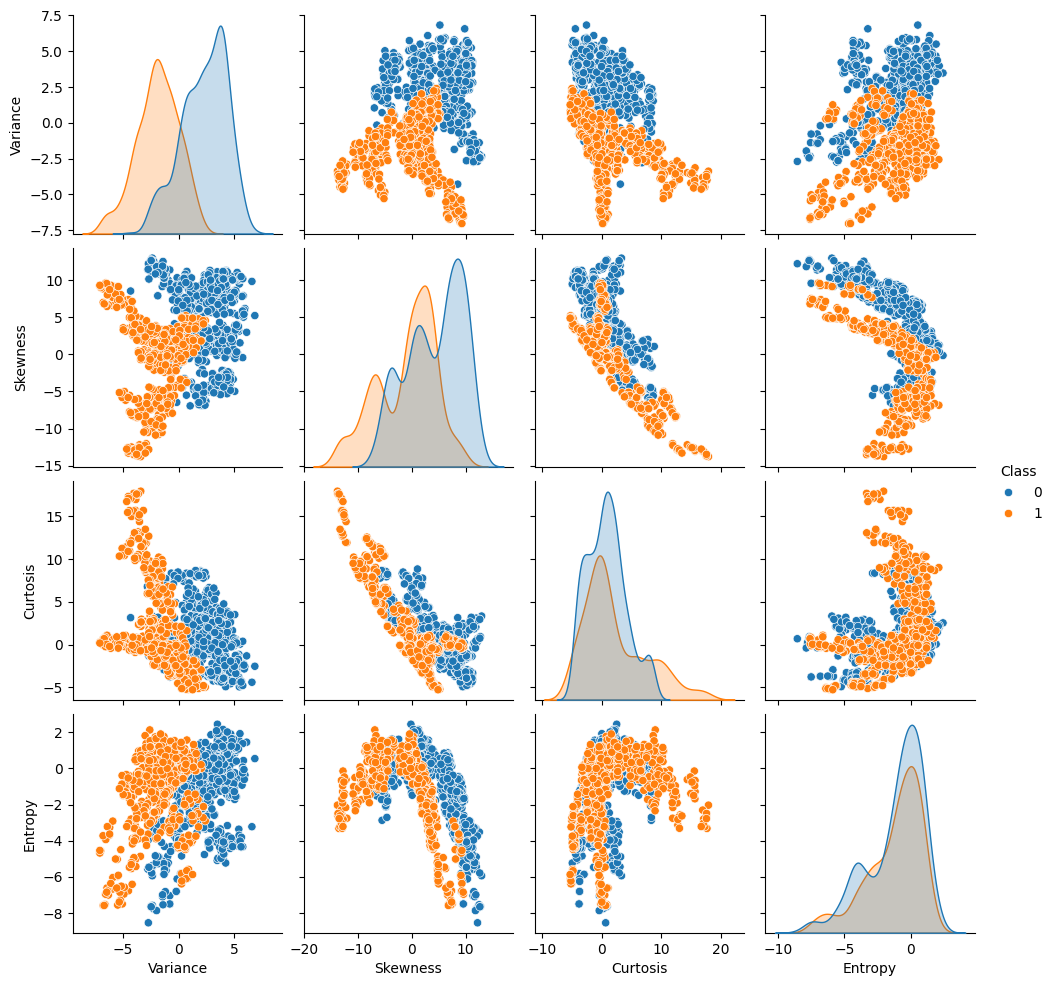

In [6]:
sns.pairplot(df,hue = 'Class')

In [7]:
x.describe()

,Variance,Skewness,Curtosis,Entropy
count,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657
std,2.842763,5.869047,4.310030,2.101013
min,-7.042100,-13.773100,-5.286100,-8.548200
25%,-1.773000,-1.708200,-1.574975,-2.413450
50%,0.496180,2.319650,0.616630,-0.586650
75%,2.821475,6.814625,3.179250,0.394810
max,6.824800,12.951600,17.927400,2.449500


## Normalize data

In [8]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
pd.DataFrame(x_scaled).describe()

,0,1,2,3
count,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.539114,0.587301,0.287924,0.668917
std,0.205003,0.219611,0.185669,0.191041
min,0.000000,0.000000,0.000000,0.000000
25%,0.379977,0.451451,0.159869,0.557821
50%,0.543617,0.602168,0.254280,0.723929
75%,0.711304,0.770363,0.364674,0.813171
max,1.000000,1.000000,1.000000,1.000000


## Cross Validation

In [9]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,random_state = 0,stratify = y)

## MOdel Building

In [12]:
rf = RandomForestClassifier(random_state = 0)
rf.fit(x_train,y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [13]:
y_pred = rf.predict(x_test)

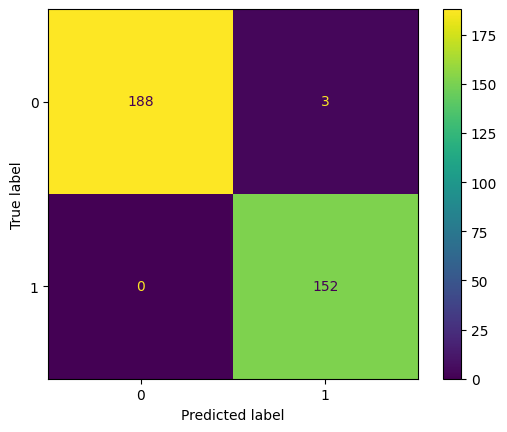

In [14]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [15]:
accuracy_score(y_test,y_pred)

0.9912536443148688

In [16]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       191
           1       0.98      1.00      0.99       152

    accuracy                           0.99       343
   macro avg       0.99      0.99      0.99       343
weighted avg       0.99      0.99      0.99       343



In [18]:
newdf=pd.DataFrame(data=[[0.3294,-4.45520,4.5718,-0.98880],[-3.75030,-13.45860,17.5932,-2.77710],[-0.7869,9.5663,-3.7867,-7.5034]],columns=x.columns)

In [19]:
x_scaled = scaler.transform(newdf)

rf.predict(x_scaled)

array([0, 1, 0])

In [20]:
rf.feature_importances_

array([0.55362182, 0.2213413 , 0.16882414, 0.05621273])